# Data Activity

---

Created by Daphne Giffin (djg113@pitt.edu)

---

## Activity Layout

Today, we will be doing some free-form data exploration with a dataset of your choosing! First, please go to [Kaggle](https://www.kaggle.com/datasets) and select a dataset; it can be any dataset you want. 

**MAKE SURE TO SAVE IT IN A SEPARATE DIRECTORY THAN THIS ONE!!!**

Afterwards, please `git clone` this repository onto your computer.

---

## Instructions

1. Make a separate branch, naming it based on the dataset you chose.

    **NOTE:** First, `cd` into the directory. Then, you run `git branch <NAME>` in the terminal to create the branch and `git checkout <NAME>` to switch to it.
2. Make a copy of this template, name it to reflect the dataset (also change the title).
3. Replace my name and email (Alejandro Ciuba) with your own.
4. Fill in the empty spaces in your Jupyter Notebook.
5. Create an Anaconda environment for this notebook.
6. Launch the environment.
7. Launch the notebok within the environment.

    **NOTE:** This is done either through selecting the kernel in VSCode or running `jupyter <NAME>` after environment launch.

From there, you are free to explore your data however you see fit! Make graphs, record anomalies, make connections. I recommend performing some statistical tests if you know them (although we'll cover those next week). Run `pip install <NAME>` for any packages you might need (e.g., [pandas](https://pandas.pydata.org/docs/), matplotlib, seaborn, etc.). Once we are finished, we will go over making an `environment.txt` file and forming pull requests.

---

## Imports & Settings

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Each code-block should be concise and accomplish one or two basic tasks
%pprint  # Turn this off, let's you see more output

pd.set_option('display.max_columns', None)  # Output setting

plt.style.use('ggplot')  # I prefer this style for charts

sns.set_palette("muted")  # Set the colors for the charts

sns.color_palette("muted")  # Shows you what the color palette looks like

Pretty printing has been turned OFF


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039), (0.9333333333333333, 0.5215686274509804, 0.2901960784313726), (0.41568627450980394, 0.8, 0.39215686274509803), (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), (0.5843137254901961, 0.4235294117647059, 0.7058823529411765), (0.5490196078431373, 0.3803921568627451, 0.23529411764705882), (0.8627450980392157, 0.49411764705882355, 0.7529411764705882), (0.4745098039215686, 0.4745098039215686, 0.4745098039215686), (0.8352941176470589, 0.7333333333333333, 0.403921568627451), (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

---

## Functions

In [6]:
# Put any useful functions in their own codeblock here
def load_dataset(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

In [7]:
def percentage_plot(df: pd.DataFrame, x: str, labels: bool = False) -> plt.axes:

    ordering = df[x].value_counts().index

    plot = sns.countplot(data=df, x=x, hue=x, stat="percent", 
                         order=ordering, hue_order=ordering, palette=sns.color_palette("colorblind"))
    plot.tick_params(axis="x", rotation=90)
    plot.set_title(f"{x} Percentages")
    plot.set_ylabel("Percentage")
    plot.set_xlabel(x)

    # Uncomment this if you want percentages over your bars
    # Bonus challenge: Rotate the labels vertically so they don't collide!
    # if labels:
    #     for c in plot.containers:
    #         plot.bar_label(c, fmt="%.2f")

    return plot

---
## Globals

In [10]:
DATA = '/Users/daphnegiffin/Downloads/Worldwide Travel Cities Dataset (Ratings and Climate).csv'

---
## Load Data

In [11]:
## Use Pandas to load your dataset
df = load_dataset(DATA)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

In [24]:
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,culture_cuisine_sum
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2,10
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4,6
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2,9
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2,8


In [ ]:
## Use df.info() to get an overview
## Use df.describe() to get the data's descriptive statistics (mean, max/min, etc.)

---

## Data Exploration

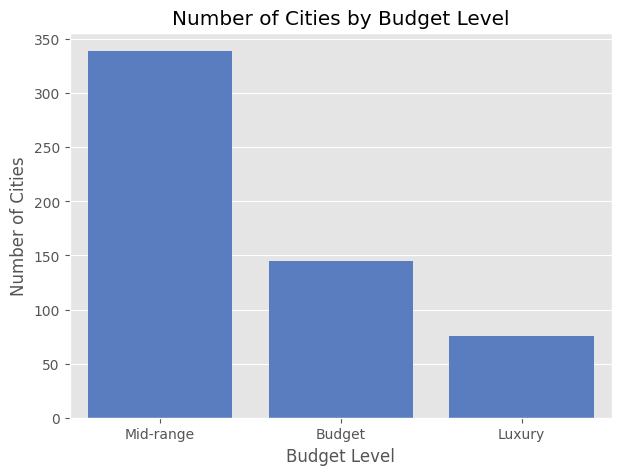

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='budget_level', order=df['budget_level'].value_counts().index)
plt.title('Number of Cities by Budget Level')
plt.xlabel('Budget Level')
plt.ylabel('Number of Cities')
plt.show()


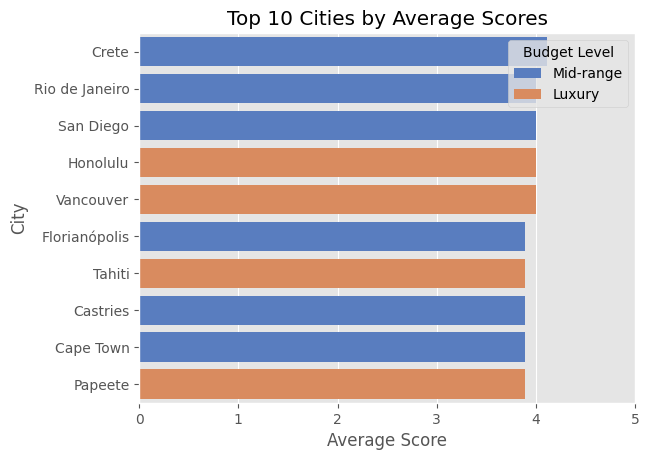

In [ ]:
rating_cols = ['culture', 'adventure', 'nature', 'beaches', 'nightlife',
               'cuisine', 'wellness', 'urban', 'seclusion']

df['average_score'] = df[rating_cols].mean(axis=1)

top_avg_cities = df.sort_values(by='average_score', ascending=False).head(10)

sns.barplot(data=top_avg_cities, y='city', x='average_score', hue='budget_level', dodge=False)
plt.title('Top 10 Cities by Average Scores')
plt.xlabel('Average Score')
plt.ylabel('City')
plt.xlim(0, 5)
plt.legend(title='Budget Level')
plt.show()


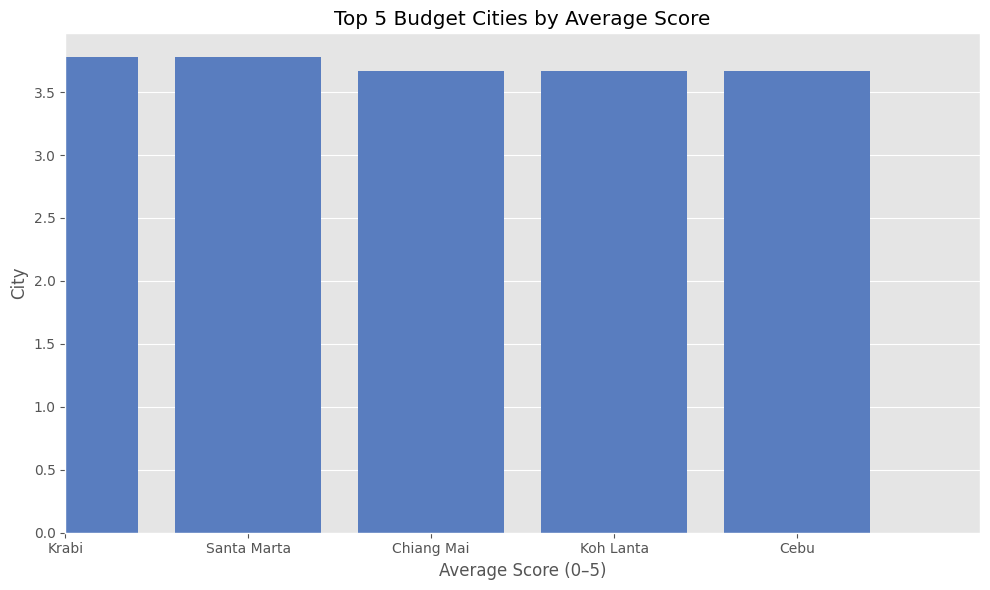

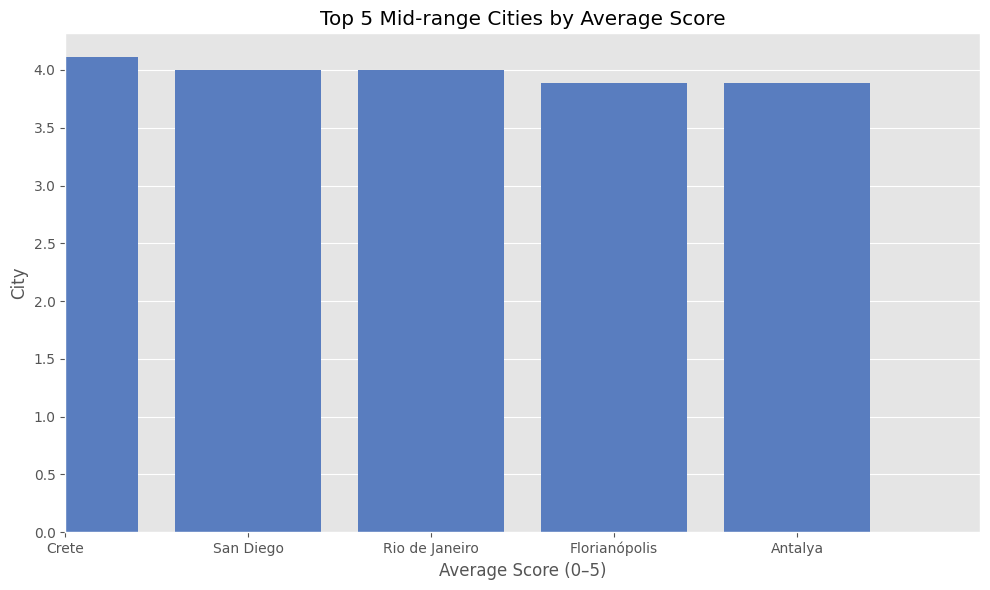

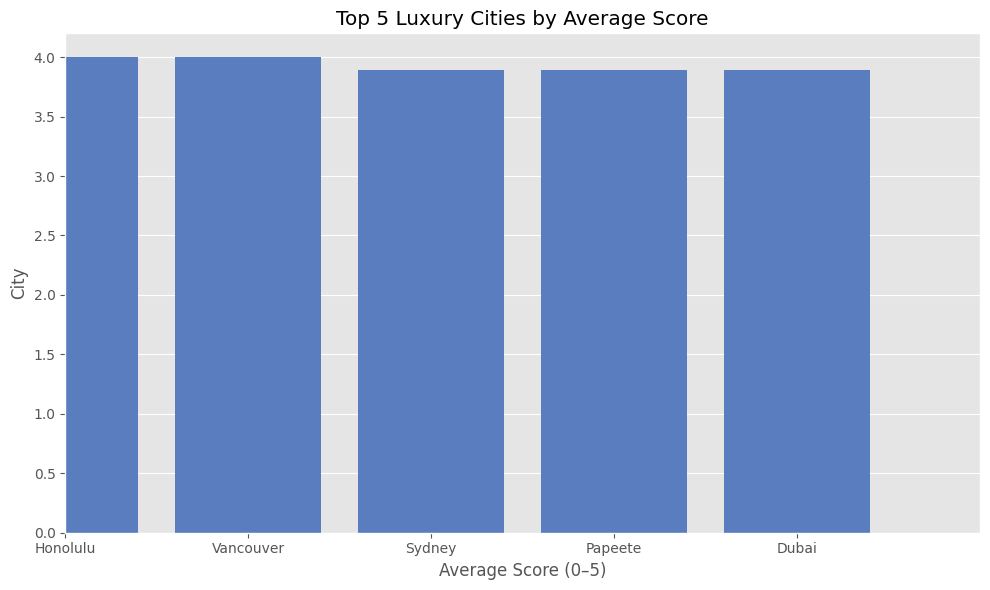

In [31]:
for budget in ['Budget', 'Mid-range', 'Luxury']:
    top_cities = df[df['budget_level'] == budget].sort_values(by='average_score', ascending=False).head(5)

    plt.figure(figsize=(10,6))
    sns.barplot(data=top_cities, y='average_score', x= 'city')
    plt.title(f'Top 5 {budget} Cities by Average Score')
    plt.xlabel('Average Score (0–5)')
    plt.ylabel('City')
    plt.xlim(0, 5)
    plt.tight_layout()
    plt.show()